In [379]:
import os

import csv
import pandas as pd

%matplotlib inline

In [ ]:
# Déclaration des constantes
DATA_DIR = '../data/external/'
PROCESSED_DIR = '../data/processed/'

CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
PS_CITIES_FILENAME = 'PS_Communes.csv'
ANALYSIS_FILENAME = 'analyse.csv'

In [ ]:
analyse_df = pd.read_csv(os.path.join(PROCESSED_DIR, ANALYSIS_FILENAME),
                                 sep=';',
                                 dtype={'CODGEO':str, 'codecommuneetablissement':str}, #On les encodre en string car les données manquantes sont considérées comme des nombres, donc mix types, donc bug.
                                 )

In [ ]:
# Utile pour analyser ce qu'il se passe lorsque des mixed types sont importés
list(enumerate(analyse_df.columns))

In [ ]:
(analyse_df.generaliste / analyse_df.NBPERSMENFISC15).mean()

In [ ]:
analyse_df.NBPERSMENFISC15.sum() / analyse_df.generaliste.sum()

In [ ]:
analyse_df.NBPERSMENFISC15.sum() # Nombre d'habitants (ici j'ai une petite erreur)

In [ ]:
analyse_df.generaliste.sum()

In [ ]:
analyse_df.columns

In [ ]:
analyse_df.shape

In [ ]:
(100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15).hist(bins=50)

In [ ]:
analyse_df['generaliste_habitants'] = (100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15)

In [ ]:
analyse_df.query('generaliste_habitants < 500').generaliste_habitants.hist(bins=50)

In [ ]:
analyse_df.CODGEO.str[:2].head()

In [ ]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]

In [ ]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]['codecommuneetablissement']

In [ ]:
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement']

In [ ]:
# Affiche les communes qui n'ont pas de code geo (on peut connaître le département)
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement'].str[:2].value_counts()

In [ ]:
analyse_df.columns

In [ ]:
dept_df = (analyse_df
          .dropna(subset=['CODGEO', 'NBPERSMENFISC15'])
          .assign(departement = lambda df: df.CODGEO.str[:2])
          .groupby('departement')
           [['NBPERSMENFISC15','ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',]]
           .sum()
          )

In [ ]:
dept_df.head()

In [ ]:
dept_df['generaliste_habitant'] = 100_000 * dept_df.generaliste / dept_df.NBPERSMENFISC15

In [ ]:
dept_df.generaliste_habitant.hist(bins=25)

In [ ]:
dept_df.generaliste_habitant.describe()
# En moyenne 142 généralistes pour 100 000 habitants

In [ ]:
# Affichage des 5 départements les mieux classés et des 5 départements les moins bien classés en terme de généralistes par habitants

pd.concat([
    dept_df.sort_values(by='generaliste_habitant')[['NBPERSMENFISC15', 'generaliste_habitant']].head(),
    dept_df.sort_values(by='generaliste_habitant')[['NBPERSMENFISC15', 'generaliste_habitant']].tail()],
    axis=0)


In [ ]:
dept_df['infirmiers_habitant'] = 100_000 * dept_df.infirmiers / dept_df.NBPERSMENFISC15

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

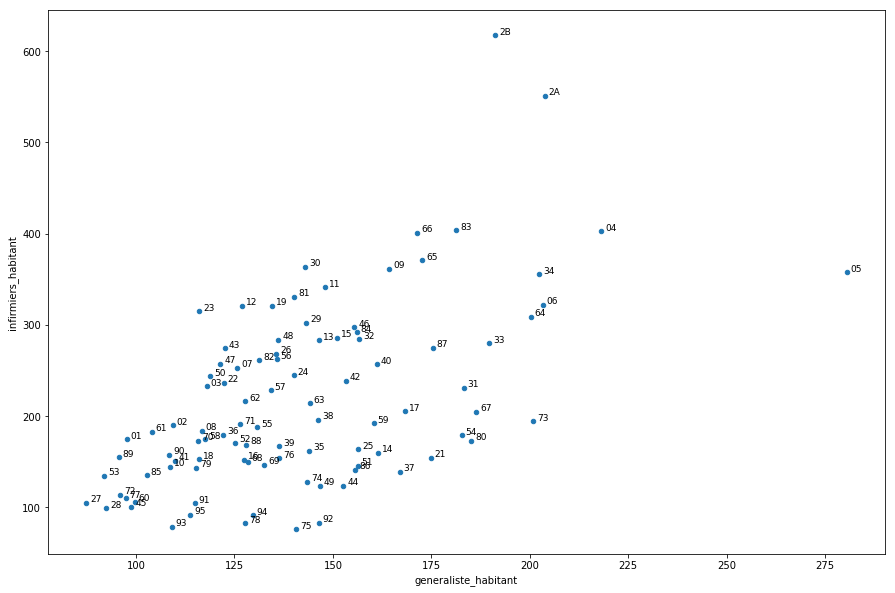

In [374]:
# En rajoutant un ";" à la fin, on permet d'afficher un graphique sans afficher le nom de l'objet


dept_df.plot(kind='scatter', x='generaliste_habitant', y='infirmiers_habitant', figsize=(15,10));

# Comme le tableau est petit, on peut itérer sur chaque élément, on itère donc sur toutes les valeurs de i. Sur chaque valeur de i on écrit un texte
# iloc = index location. Pour éviter qu'ils soient trop collés au point, on rajoute un décalage en x et en y, ce qui permet de décoller les points
# 

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['infirmiers_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

C:\Users\VirgilusFixe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


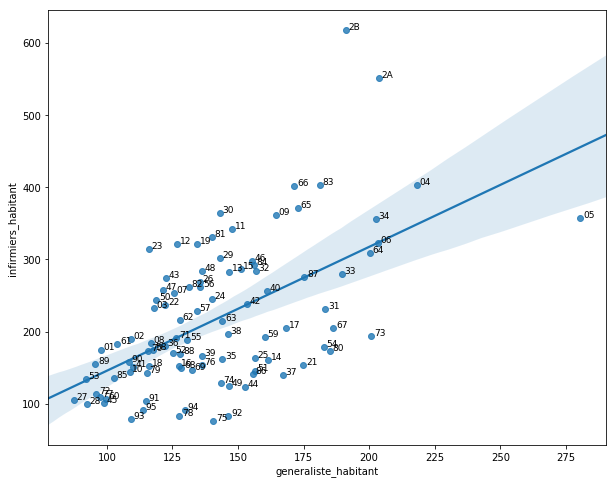

In [366]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='generaliste_habitant', y='infirmiers_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['infirmiers_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

### Pour les ambulanciers

In [ ]:
dept_df['ambulance_habitant'] = 100_000 * dept_df.ambulance / dept_df.NBPERSMENFISC15

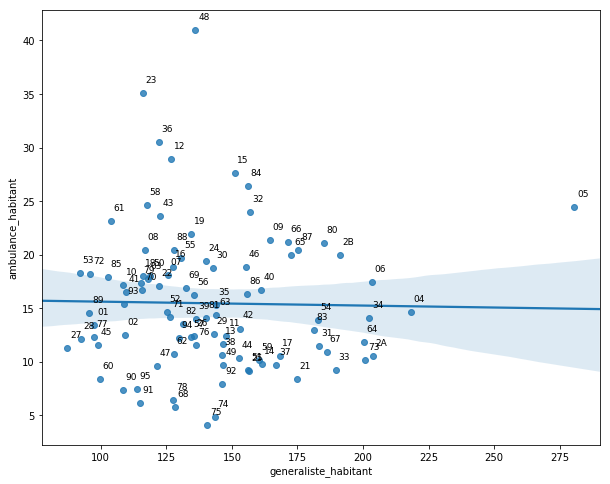

In [375]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='generaliste_habitant', y='ambulance_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['ambulance_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

### Pour les hôpitaux

In [ ]:
dept_df['hopital_habitant'] = 100_000 * dept_df.hopital / dept_df.NBPERSMENFISC15

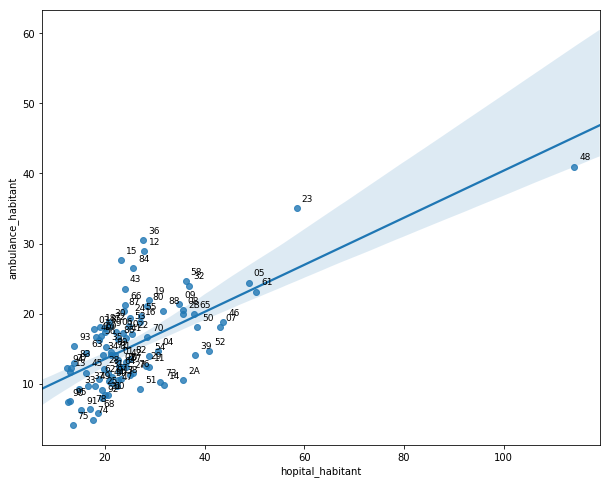

In [376]:
# Avec seaborn

plt.figure(figsize=(10, 8))

sns.regplot(x='hopital_habitant', y='ambulance_habitant', data=dept_df)

for i in range(0,dept_df.shape[0]):
    plt.text(dept_df['hopital_habitant'].iloc[i]+1, # Position en x du libellé
            dept_df['ambulance_habitant'].iloc[i]+1, # Position en y du libellé
            dept_df.index[i], # texte du libellé.
             fontsize = 9
            )

In [ ]:
# Ici on a une bonne corrélation. Le dépt 48 est toujours assez spécial.

In [ ]:
import pygal.maps

In [ ]:
dept_df['generaliste_habitant'].to_dict()

### Ajout des régions dans le fichier département

In [377]:
regions_df = pd.read_csv('https://gist.githubusercontent.com/gzurbach/b0ccdeda51ec2fe135d5/raw/b89e3d2ac21ddb251b1aed0528ddc9437a07818f/departments_regions_france_2016.csv',
                         dtype=str,
                         sep = ",",
                        )
regions_df.rename(columns={'departmentCode':'departement'}, inplace=True)
regions_df['departement'] = regions_df['departement'].str.upper() # On passe la colonne en upper case pour que les codes de la corse ("2a" et "2b") soient correctement formatés.


In [ ]:
dept_df = dept_df.drop('97') # Suppression de l'observation des départements qui ne sont pas en France métropolitaine et commencent donc par 97

In [ ]:
dept_df = pd.merge(dept_df,
                     regions_df[['regionName','departement']],
                     how='left', on='departement'
                    ).set_index('departement')

### Calcul d'un indice

Il existe une grande variété d'indicateurs utilisés pour calculer un désert médical.
Le ministère de la Santé [considère](http://www.leparisien.fr/societe/grand-debat-et-si-on-forcait-les-medecins-a-s-installer-dans-les-deserts-medicaux-26-02-2019-8020416.php) qu’un territoire rentre dans la catégorie du « désert médical » quand la densité de médecins par rapport à la population est de 30 % inférieure à la moyenne nationale.

En France il y a en moyenne, pour 100 000 habitants, [82 médecins généralistes et 85 spécialistes.](http://www.securite-sociale.fr/IMG/pdf/2_demographie_des_medecins_liberaux_et_remboursements_de_l_assurance_maladie.pdf). Malheureusement, les données utilisées pour notre étude nous amènent à un résultat plus élevé puisque notre moyenne se situe à 142 généralistes par habitants. Cependant, on peut garder l'idée comme quoi les départements pour lesquels cette moyenne est inférieure à 30% de la moyenne nationale connaissent un fort déficit de médecin. Cela peut être utile pour mettre en valeur certains départements, mais est trop réducteur pour correctement caractériser un désert médical.

##### Calcul des moyennes pour le taux d'Hopitaux par habitants, d'infirmiers par habitants et de généralistes par habitants (pour 100 000 personnes) 

In [ ]:
dept_df['generaliste_habitant'].describe()

In [ ]:
dept_df['infirmiers_habitant'].describe()

In [ ]:
dept_df['hopital_habitant'].describe()

In [ ]:
# Moyennes générales :

MOY_GENERALISTES_PAR_HAB = 141.9
MOY_INFIRMIERS_PAR_HAB = 217.7
MOY_HOPITAUX_PAR_HAB = 25.7

On définit une fonction qui calcule l'écart à la moyenne pour trois des indices les plus importants, effectue ensuite la moyenne de ces écarts et multiplie le tout par 100. Plus l'indice est bas, plus le département a des carences en terme d'accès aux professionnels de santé.

In [359]:
def indice(tx_generalistes,tx_infirmiers,tx_hopitaux):
    indice = (((tx_generalistes / MOY_GENERALISTES_PAR_HAB)
                    +(tx_infirmiers / MOY_INFIRMIERS_PAR_HAB)
                    +(tx_hopitaux / MOY_HOPITAUX_PAR_HAB))
                   / 3)
    return indice * 100
    

In [372]:
dept_df['indice'] = indice(dept_df['generaliste_habitant'],dept_df['infirmiers_habitant'],dept_df['hopital_habitant'])

In [373]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,reeducateur_podologue,generaliste_habitant,infirmiers_habitant,ambulance_habitant,hopital_habitant,regionName,indice
departement,,,,,,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,1.0,38.0,959.0,97.581387,174.894614,13.403139,22.556502,Auvergne-Rhône-Alpes,78.957882
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,5.0,59.0,562.0,109.266661,190.012218,12.526160,22.932509,Nord-Pas-de-Calais-Picardie,84.505271
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,2.0,30.0,525.0,117.985399,232.960967,17.758007,17.758007,Auvergne-Rhône-Alpes,86.418085
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,0.0,6.0,419.0,218.211748,402.607056,14.675059,30.626210,Provence-Alpes-Côte d'Azur,152.627770
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,2.0,25.0,596.0,280.554743,357.540742,24.428249,48.856499,Provence-Alpes-Côte d'Azur,184.017211


In [380]:
dept_df.to_csv('departements_et_regions.csv', sep=',', encoding='utf-8', quotechar='"', index=False, quoting=csv.QUOTE_ALL)